### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [8]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [9]:
datos

,WATER,PROTEIN,FAT,LACTOSE,ASH
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA_PIG,81.9,7.4,7.2,2.7,0.85
CAT,81.6,10.1,6.3,4.4,0.75


Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

R:los datos muestran los aportes nutricionales de la compocicion de la leche de cada animal. 
la idea seria que apartir de estos datos y el algortimo de kmeans podamos crear grupos de similitud entre cada animal
y encontrar clases de animales marcadas, despues seria poder predecir la clase de otro animal segun sus atrubitos de leche.

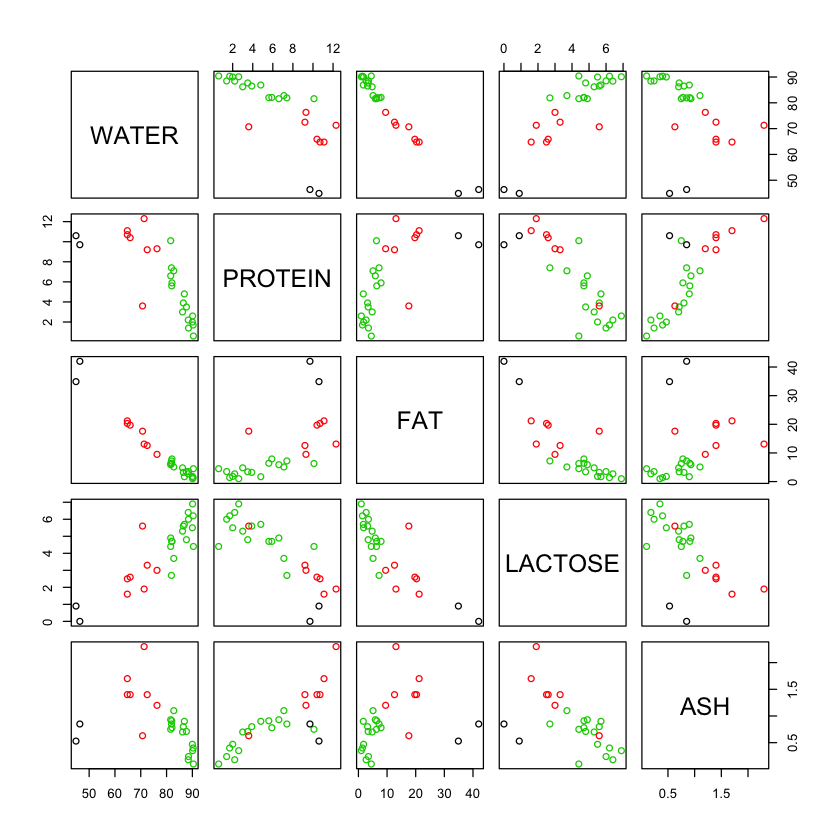

In [11]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Ejercicio 2: Interprete y comente los resultados obtenidos. 

R:en general los grupos diferenciados por el modelos kmeans se mantiene al comparar los aportes entre los nutrientes.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
2,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
3,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841


K-means clustering with 3 clusters of sizes 2, 7, 16

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 45.65000 10.150000 38.45000 0.450000 0.690000
2 69.47143  9.514286 16.28571 2.928571 1.432857
3 86.06250  4.275000  4.17500 5.118750 0.635625

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          3          3          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          1          1 

Within cluster sum of squares by cluster:
[1]  27.1912 299.9911 377.2215
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

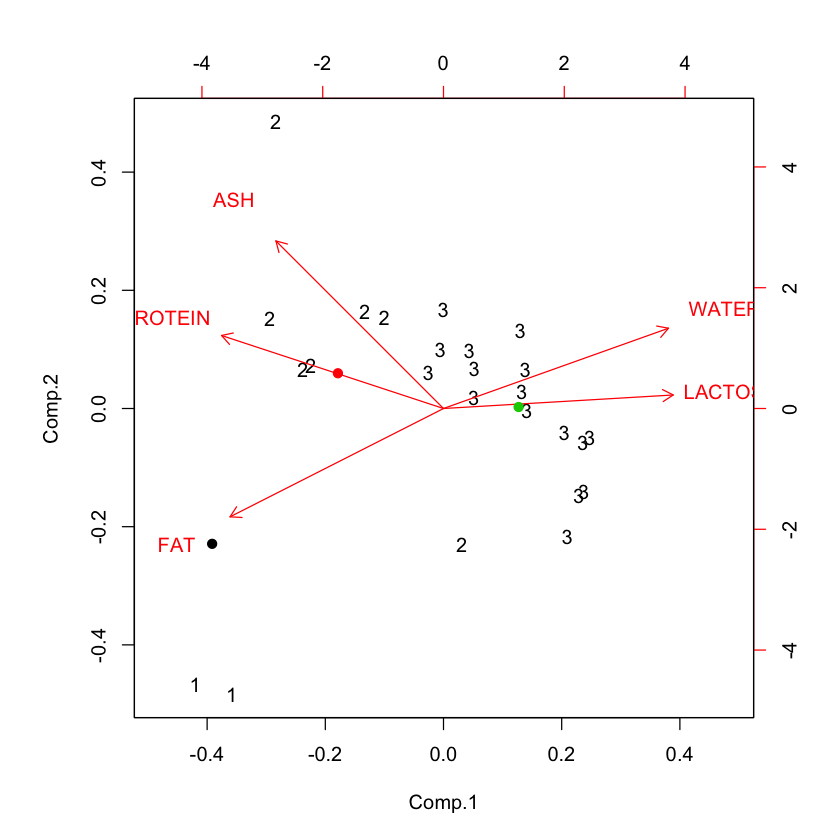

In [12]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632
2,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003


K-means clustering with 2 clusters of sizes 8, 17

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 62.66250 9.700000 22.675000 2.300000 1.2762500
2 85.48824 4.570588  4.488235 4.994118 0.6688235

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          2          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          1          1 

Within cluster sum of squares by cluster:
[1] 1664.9235  521.8994
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

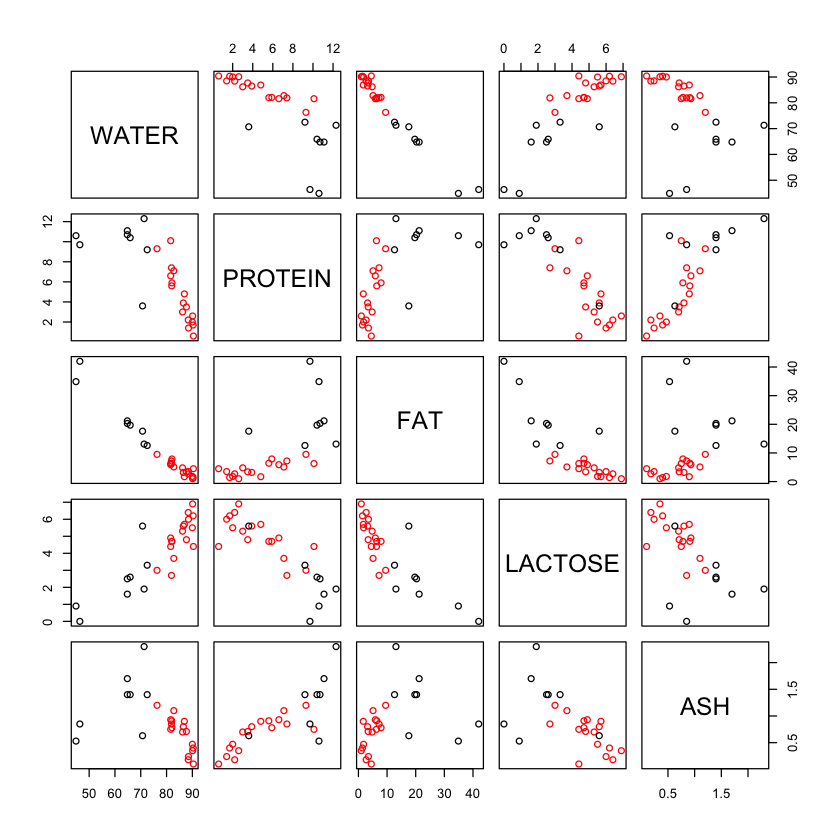

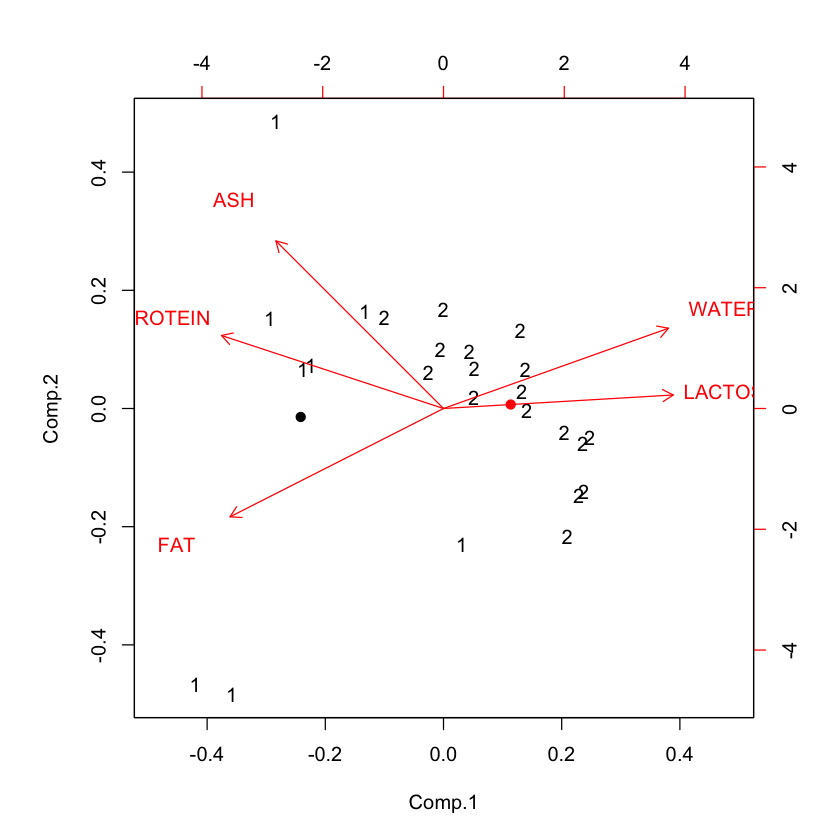

In [13]:
#ingresar valor de k0 
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595
2,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768
3,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286
4,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957


K-means clustering with 4 clusters of sizes 7, 6, 10, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 81.18571  7.428571  6.90000 4.014286 0.9314286
2 68.33333  9.550000 17.41667 2.916667 1.4716667
3 88.50000  2.570000  2.80000 5.680000 0.4850000
4 45.65000 10.150000 38.45000 0.450000 0.6900000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          3          3          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          1          1          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          4          4 

Within cluster sum of squares by cluster:
[1]  63.53491 191.74708  59.41225  27.19120
 (between_SS / tot

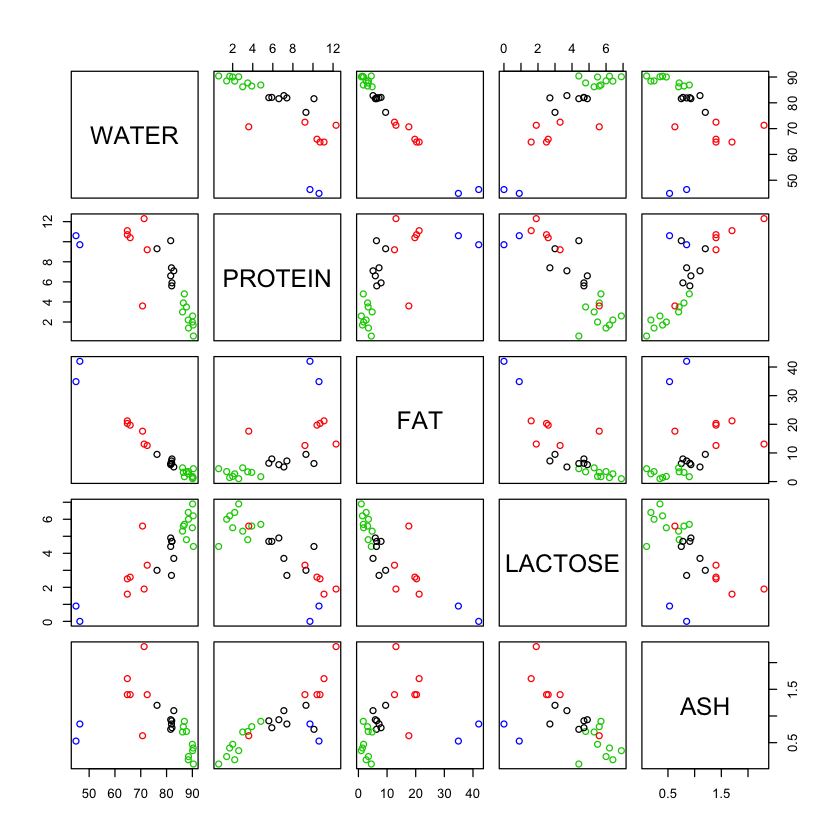

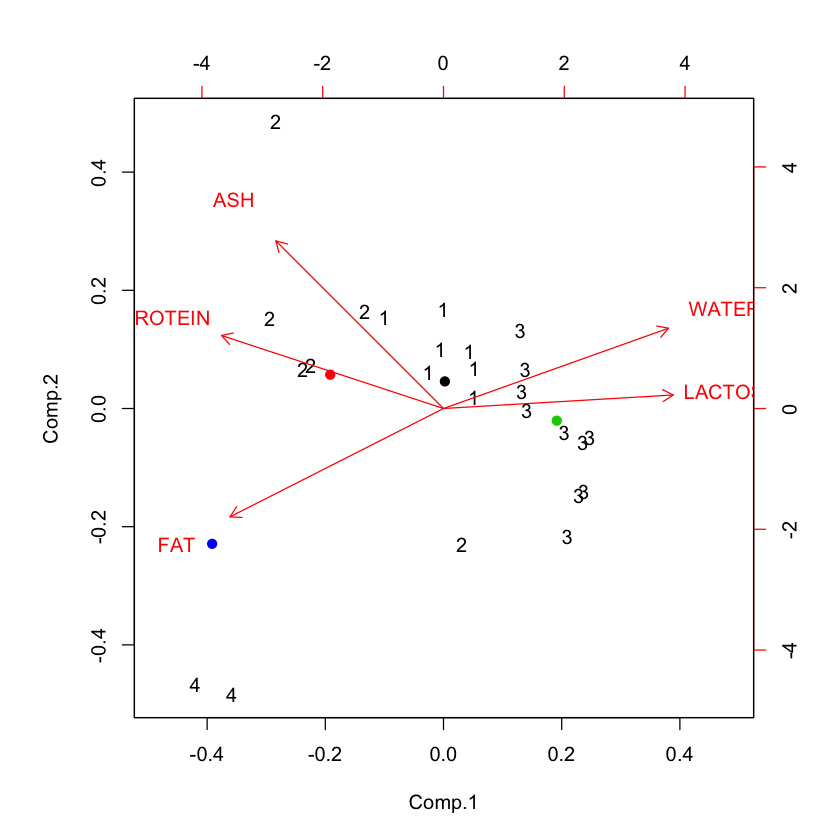

In [14]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

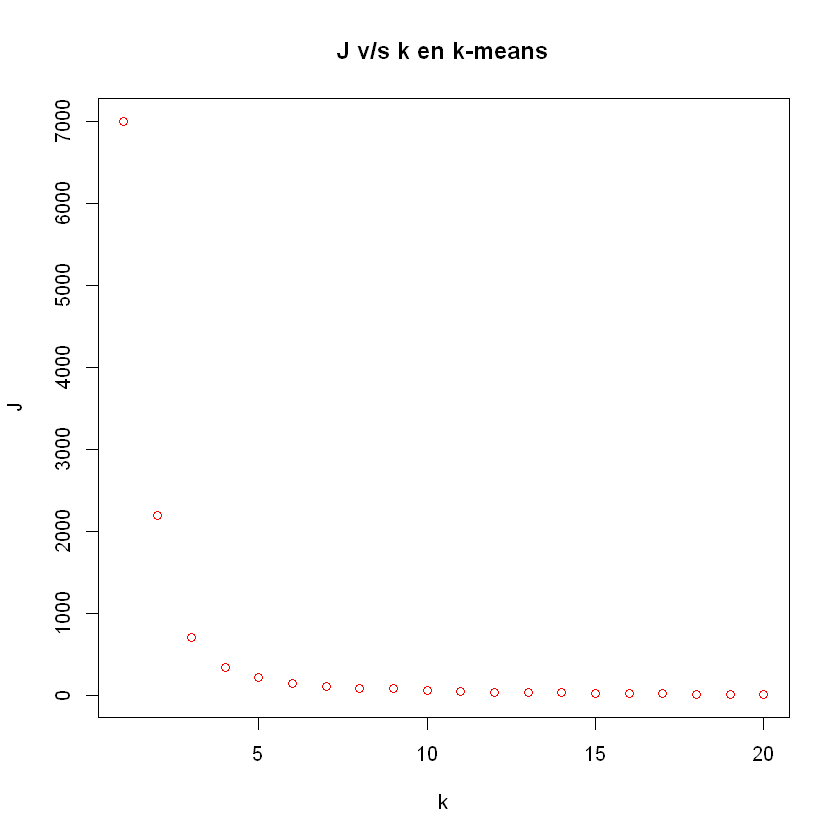

In [4]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Ejercicios 3 discucuon: al evaluar las 3 matrices de agrupamiento entre atributos se logra ver  que muentras mayor sea le numero de grupos mas difuso son ven bien definidos los grupos. 
por lo que encontrar un numero indicado de k grupos habria que hacerlo bajo un criterio usando la funcion de perdida ,  en este caso donde la diferencia entre el las imagenes de los k grupos sea mayor. por lo que 3 grupos seria mejor. 


Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Agregue código para automatizar este criterio.

R: El valor mas apropiado de K es el K=3 porque exsite una mayor deferenci ente la imagen de k2 y k4 que son sus antesesores y sucesores.

Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

       R1              R2              R3              R4       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.000   Median :3.000   Median :3.000   Median :2.000  
 Mean   :2.556   Mean   :2.604   Mean   :2.519   Mean   :2.262  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R5              R6              R7              R8       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :2.000   Median :3.000  
 Mean   :1.348   Mean   :1.882   Mean   :2.374   Mean   :2.642  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :3.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R9             R10             R11             R12       
 Min.   :1.000   Min.   :

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
1,-2.3916997,-0.9624430,0.6262596,-0.11199542,0.5046271,-0.3428292,-0.064141554,-0.462862684,0.15374286,-0.22192048,0.07626534,-0.22947740,-0.00328023,0.110776634,-0.03952375,0.062855979
2,2.1868613,-0.1964867,0.1869308,0.09255199,0.1292262,-0.1915848,-0.110842455,0.056692200,0.07333594,-0.12375289,0.09097698,-0.01604904,-0.13262181,-0.015763141,0.01596597,-0.033481106
3,-0.3855640,-0.6105033,-0.7907142,0.30212138,-0.6604851,-0.1115197,0.007587539,0.005258046,-0.17818149,0.21056283,-0.16018871,0.16962080,0.01716166,-0.035103258,0.05660111,-0.009165873
4,-0.2990778,1.0702662,0.2359947,-0.26990738,0.2255834,0.3862641,0.105716981,0.154267722,0.02402274,0.01725055,0.02958938,-0.02742687,0.08784753,-0.007416699,-0.04145025,0.005547743


K-means clustering with 4 clusters of sizes 27, 47, 51, 62

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.000000 1.962963 1.407407 1.666667 1.000000 2.259259 2.074074 1.555556
2 2.957447 2.914894 3.021277 2.319149 1.680851 1.744681 2.808511 3.021277
3 1.960784 2.431373 2.568627 2.372549 1.352941 1.960784 2.176471 2.627451
4 2.983871 2.790323 2.580645 2.387097 1.241935 1.758065 2.338710 2.838710
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.259259 2.074074 3.666667 1.444444 2.000000 1.222222 1.296296 1.074074
2 1.765957 1.872340 2.702128 2.382979 2.553191 1.617021 2.319149 1.787234
3 1.313725 2.137255 3.450980 1.764706 3.352941 1.372549 1.607843 1.235294
4 1.209677 1.822581 3.419355 1.370968 1.887097 1.129032 1.532258 1.161290

Clustering vector:
  [1] 3 1 3 3 3 4 4 1 3 1 3 1 4 2 3 4 3 3 2 2 3 4 2 2 4 1 4 3 4 4 3 3 2 4 3 3 4
 [38] 3 1 3 4 1 2 3 4 4 1 4 3 3 4 3 3 2 2 2 3 2 2 2 4 2 4 4 4 2 4 2 2 2 3 4 4 2
 [75]

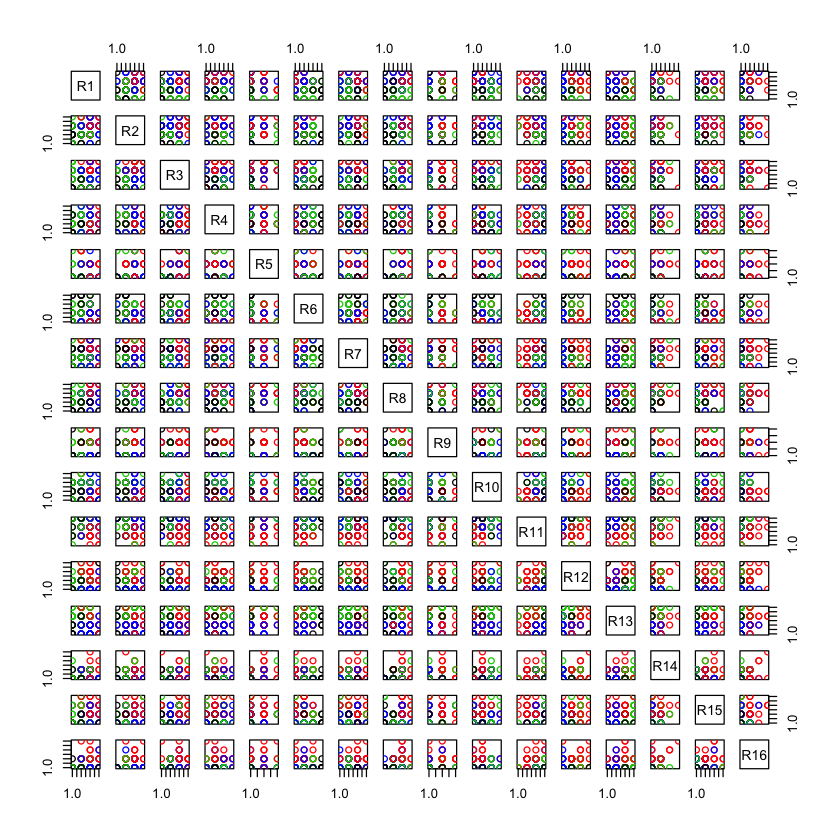

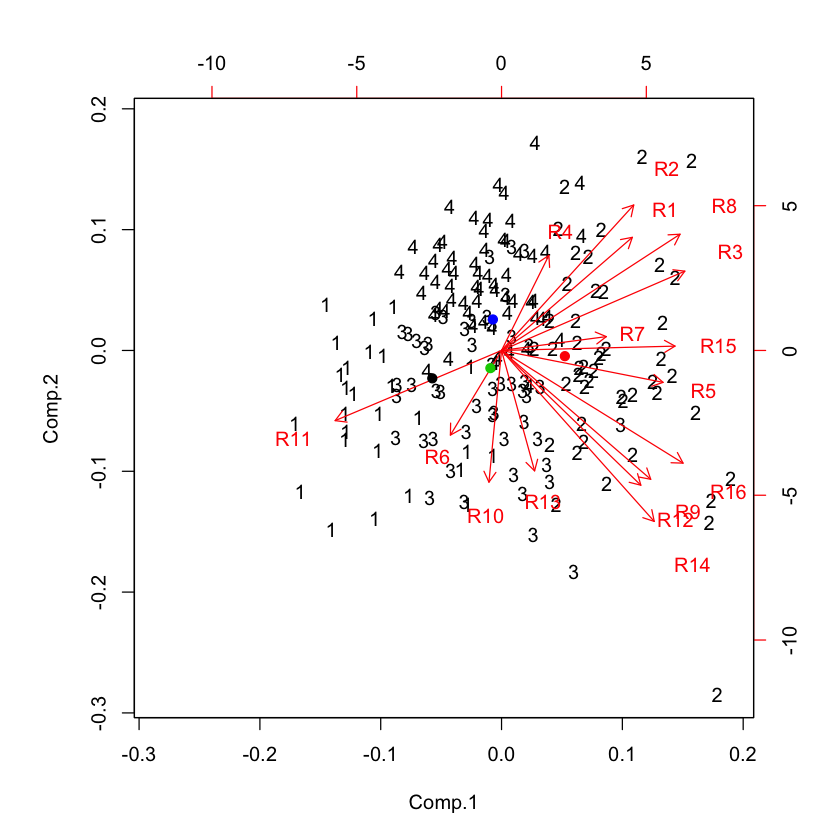

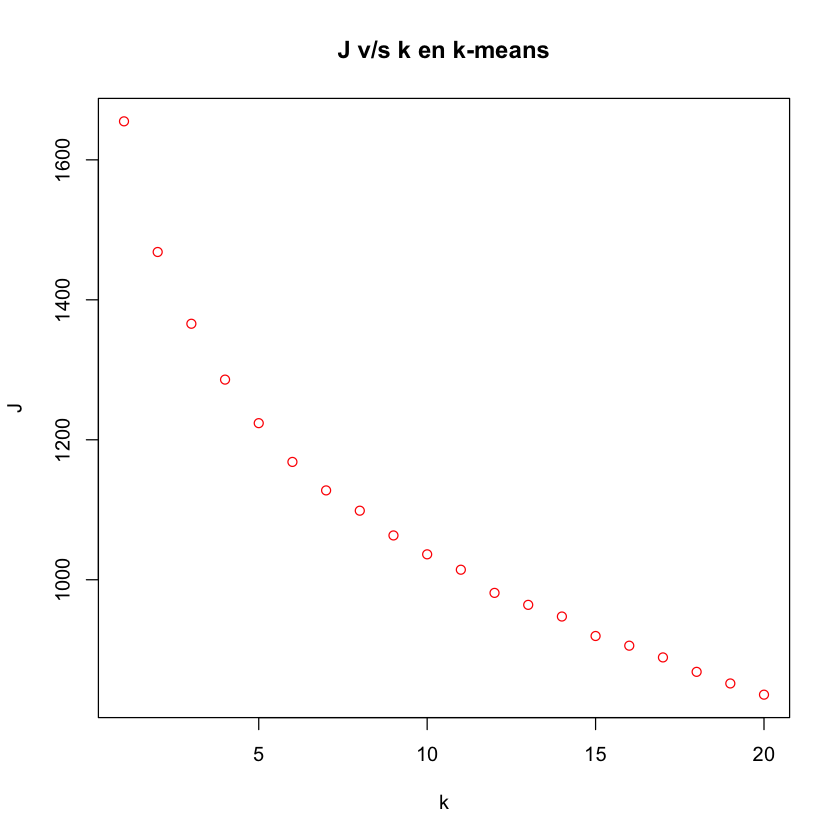

In [24]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("DatosUsoFacebook.csv",sep= ";", header=TRUE)
summary(datos)
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

R: dificil de analizar porque son muchos atributos , la funcion de perdida tampoco es muy clara para evaluar un buen numero de grupos 